## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [1]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [2]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 5       3       6       4       3       

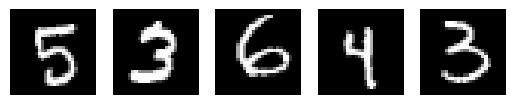

In [3]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [4]:
# Flatten the images into 1-d vectors

x_train_flatten = np.reshape(x_train, (x_train.shape[0], 784))                                     # flatten the images of training set
x_test_flatten = np.reshape(x_test, (x_test.shape[0], 784))                                     # flatten th eimages of test set


# Divide the training data into training and validation data....

n_validation = 10000                                        # choose number of images to be used for validation

x_validation = x_train_flatten[:n_validation]
y_validation = y_train[:n_validation]

x_train_flatten = x_train_flatten[n_validation:]
y_train = y_train[n_validation:]






### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [5]:
model = keras.models.Sequential([
     keras.layers.Input(shape=(784,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax') #softmax is used bcz it is multiclass classification
])

# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True)
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [8]:
model.compile(optimizer="Adam",loss = "sparse_categorical_crossentropy",metrics=["accuracy"])

n_epochs = 10              # set number of epochs
batch_size = 512            # you can tweak with these parametrs
history = model.fit(x_train_flatten, y_train,
                    epochs=n_epochs,
                    batch_size=batch_size,
                    validation_data=(x_validation, y_validation))

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9085 - loss: 0.4234 - val_accuracy: 0.9222 - val_loss: 0.3796
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9363 - loss: 0.2492 - val_accuracy: 0.9338 - val_loss: 0.3212
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9522 - loss: 0.1798 - val_accuracy: 0.9419 - val_loss: 0.2897
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9565 - loss: 0.1531 - val_accuracy: 0.9451 - val_loss: 0.2667
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9630 - loss: 0.1258 - val_accuracy: 0.9465 - val_loss: 0.2609
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9671 - loss: 0.1076 - val_accuracy: 0.9479 - val_loss: 0.2540
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9700 - loss: 0.0958 - val_accuracy: 0.9510 - val_loss: 0.2448
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9724 - loss: 0.0898 - val_accuracy: 0.9512 - val_loss

### **Evaluate**
Evaluate your model on test data.

And Show some results

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9470 - loss: 0.3057
Loss =  0.2635403573513031
Accuracy =  95.38000226020813 %


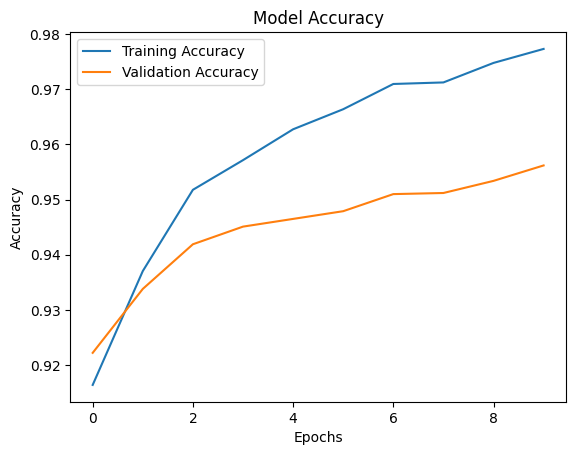

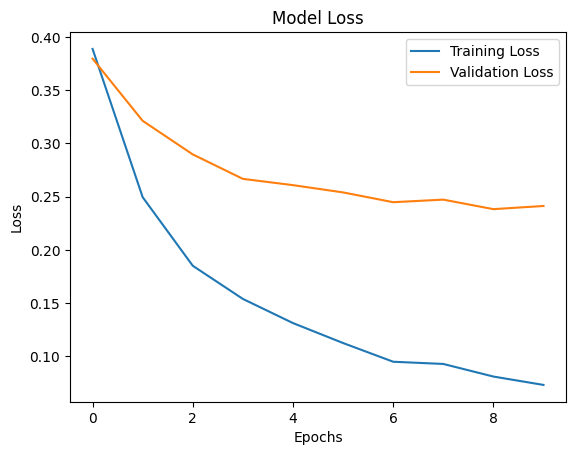

In [9]:
results = model.evaluate(x_test_flatten,y_test)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Lets show our results on images from testing dataset

Labels: 
5       2       8       8       0       

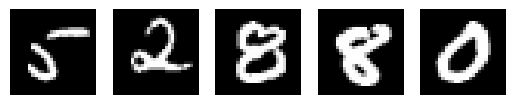


Predicted values: 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
0      

In [10]:
n = 5  # number of images to see predictions on

# Choose random indices from test data
index = np.random.choice(len(x_test_flatten), n, replace=False)

print("Labels: ")
for i, ind in enumerate(index):
    plt.subplot(1, n, i + 1)
    # Remember x_test_flatten is flattened (1,784), so reshape it to 28x28 for plotting
    plt.imshow(x_test_flatten[ind].reshape(28, 28), cmap='gray')
    plt.axis("off")
    print(y_test[ind], end="       ")

plt.show()

print("\nPredicted values: ")
for i, ind in enumerate(index):
    # Model output is a 10-dimensional vector of class probabilities
    preds = model.predict(x_test_flatten[ind].reshape(1, 784))  # Predict for one sample
    digit = np.argmax(preds)  # index with highest probability
    print(digit, end="      ")